
Right click and open the link below in new tab to open the notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KenR22/fmri_gnn/blob/master/network_project_fmri.ipynb)

This project will use ADHD 200 dataset and construct graph data based on functional connectivity from fMRI data. The graph data will be used to predict whether a person has ADHD or not.

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
!pip install nilearn

     |████████████████████████████████| 3.1MB 9.0MB/s 


# Import Dataset

In [2]:
from nilearn import datasets
num = 40
adhd_data = datasets.fetch_adhd(n_subjects=num)

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)



Dataset created in /root/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/74a52d3552145e11365bb68453d1a70c/adhd40_metadata.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/func.py:459: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


Downloaded 23502848 of 44414948 bytes (52.9%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010042.tgz..... done.


Downloaded 24100864 of 45583539 bytes (52.9%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010064.tgz..... done.


Downloaded 21610496 of 45461055 bytes (47.5%,    1.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010128.tgz..... done.


Downloaded 19120128 of 46216320 bytes (41.4%,    1.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0021019.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023008.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023012.tgz..... done.


Downloaded 57524224 of 72402326 bytes (79.5%,    0.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027011.tgz..... done.


Downloaded 55287808 of 76184603 bytes (72.6%,    0.8s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027018.tgz..... done.


Downloaded 59121664 of 70074120 bytes (84.4%,    0.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027034.tgz..... done.


Downloaded 55951360 of 69291635 bytes (80.7%,    0.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027037.tgz..... done.


Downloaded 23052288 of 41803342 bytes (55.1%,    0.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1019436.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1206380.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1418396.tgz..... done.


Downloaded 49938432 of 62682233 bytes (79.7%,    0.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1517058.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1552181.tgz..... done.


Downloaded 54771712 of 60663491 bytes (90.3%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1562298.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1679142.tgz..... done.


Downloaded 24559616 of 33119052 bytes (74.2%,    0.3s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2014113.tgz..... done.


Downloaded 17022976 of 45455025 bytes (37.5%,    1.7s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2497695.tgz..... done.


Downloaded 54509568 of 57992968 bytes (94.0%,    0.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2950754.tgz..... done.


Downloaded 55558144 of 67925261 bytes (81.8%,    0.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3007585.tgz..... done.


Downloaded 23838720 of 32919780 bytes (72.4%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3154996.tgz..... done.


Downloaded 56647680 of 59835286 bytes (94.7%,    0.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3205761.tgz..... done.


Downloaded 56344576 of 61857076 bytes (91.1%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3520880.tgz..... done.


Downloaded 56213504 of 59385206 bytes (94.7%,    0.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3624598.tgz..... done.


Downloaded 18989056 of 41518251 bytes (45.7%,    1.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3699991.tgz..... done.


Downloaded 19906560 of 32108848 bytes (62.0%,    0.6s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3884955.tgz..... done.


Downloaded 22921216 of 39415752 bytes (58.2%,    0.7s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3902469.tgz..... done.


Downloaded 23101440 of 59297020 bytes (39.0%,    1.6s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3994098.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4016887.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4046678.tgz..... done.


Downloaded 54116352 of 69914913 bytes (77.4%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4134561.tgz..... done.


Downloaded 22396928 of 45506732 bytes (49.2%,    1.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4164316.tgz..... done.


Downloaded 23838720 of 32363673 bytes (73.7%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4275075.tgz..... done.


Downloaded 56713216 of 73484949 bytes (77.2%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_6115230.tgz..... done.


Downloaded 23445504 of 42188959 bytes (55.6%,    0.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_7774305.tgz..... done.


Downloaded 50446336 of 70396354 bytes (71.7%,    0.8s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8409791.tgz..... done.


Downloaded 20127744 of 45075978 bytes (44.7%,    1.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8697774.tgz..... done.


Downloaded 55558144 of 63380505 bytes (87.7%,    0.3s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9744150.tgz..... done.


Downloaded 23052288 of 46607053 bytes (49.5%,    1.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9750701.tgz..... done.


http://fcon_1000.projects.nitrc.org/indi/adhd200/index.html

In [3]:
adhd_data.keys()

dict_keys(['func', 'confounds', 'phenotypic', 'description'])

In [4]:
func=adhd_data['func']

In [5]:
from nilearn import decomposition
from nilearn import plotting

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:103: UserWarning: linewidths is ignored by contourf
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2832: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


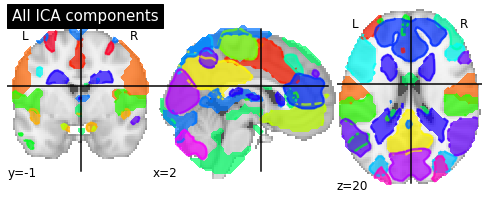

In [6]:

canica = decomposition.CanICA(n_components=20, mask_strategy="background")
canica.fit(func)
#Retrieving the components
components = canica.components_
#Using a masker to project into the 3D space
components_img = canica.masker_.inverse_transform(components)

#Plotting all the components
plotting.plot_prob_atlas(components_img, title='All ICA components')
plotting.show()

In [7]:
#Using a filter to extract the regions time series 
from nilearn import input_data
masker = input_data.NiftiMapsMasker(components_img, smoothing_fwhm=6,
 standardize=False, detrend=True,
 t_r=2.5, low_pass=0.1,
 high_pass=0.01)
#Computing the regions signals and extracting the phenotypic information of interest
subjects = []
adhds = []
sites = []
labels = []
subjects = []
adhds = []
sites = []
labels = []
for func_file, confound_file, phenotypic in zip(
        adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    subjects.append(time_series)
    is_adhd = phenotypic['adhd']
    if is_adhd == 1:
        adhds.append(time_series)    
    sites.append(phenotypic['site'])
    labels.append(phenotypic['adhd'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


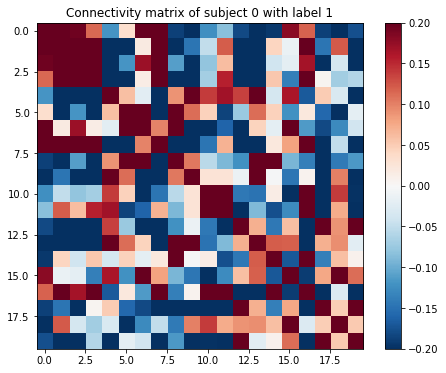

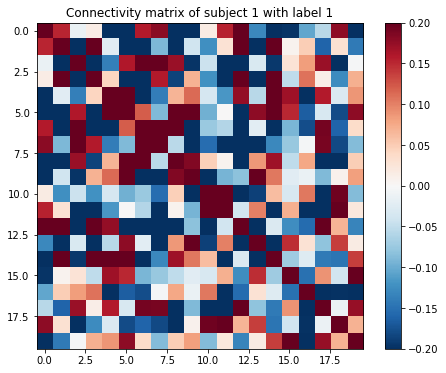

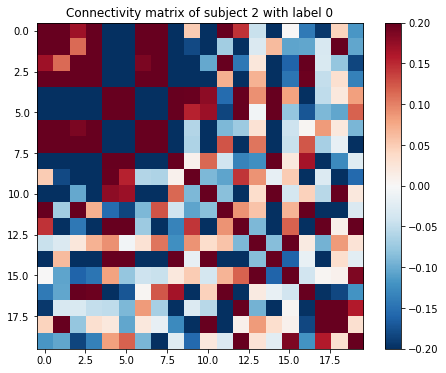

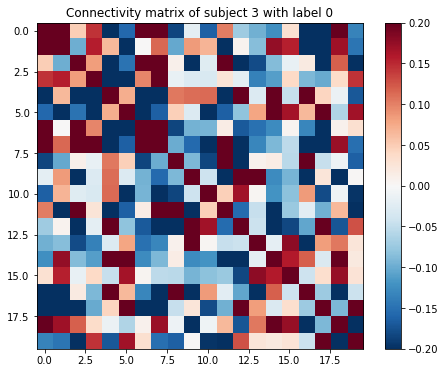

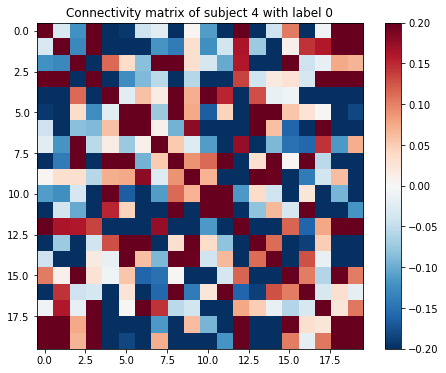

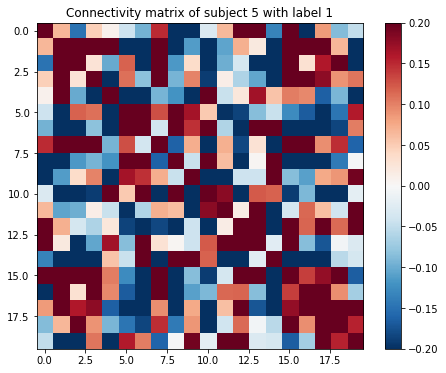

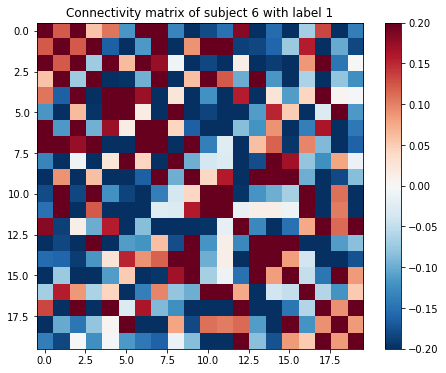

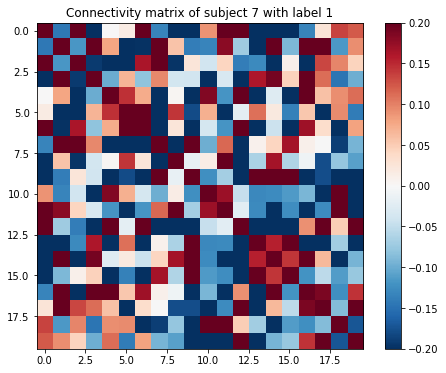

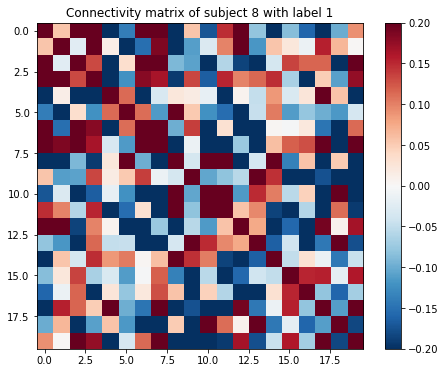

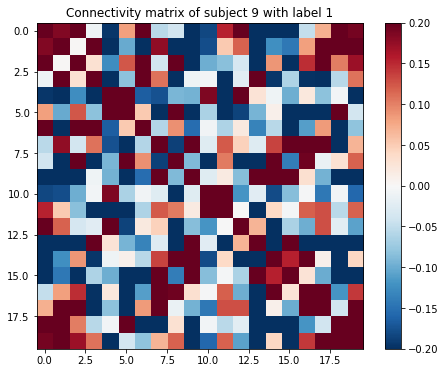

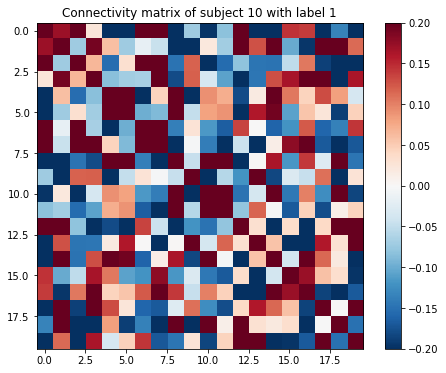

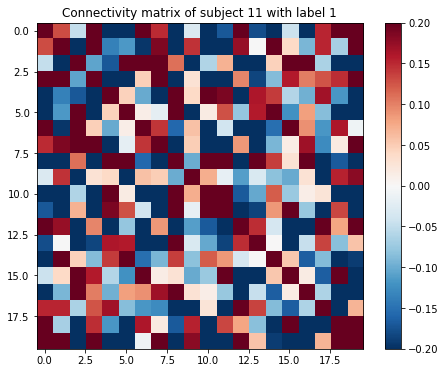

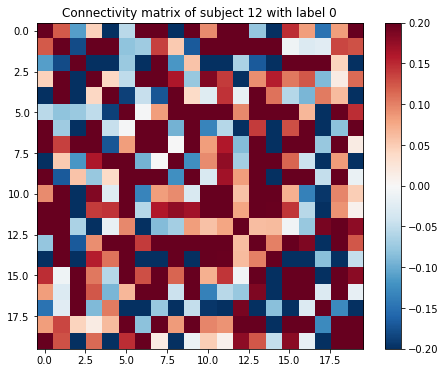

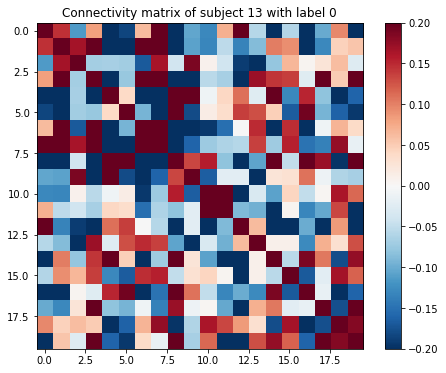

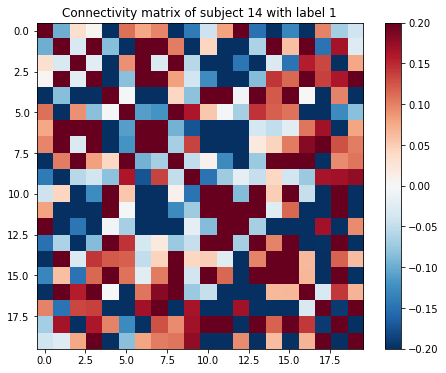

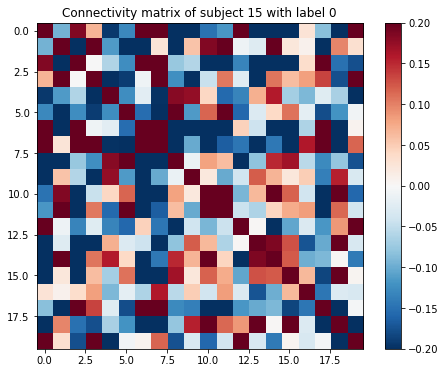

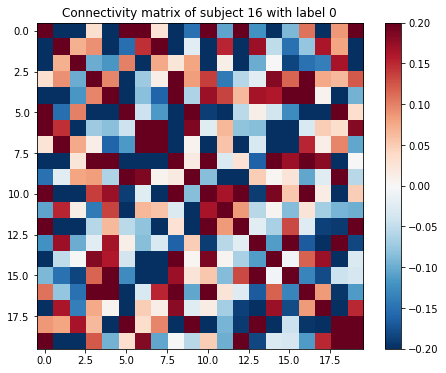

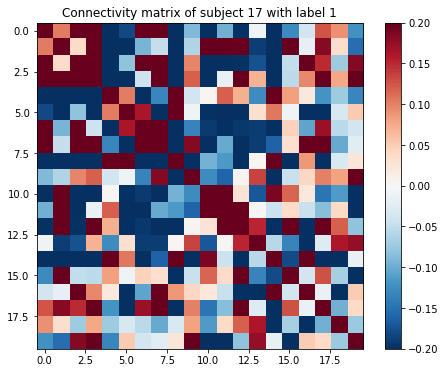

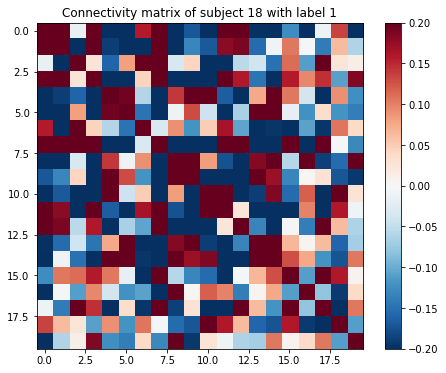

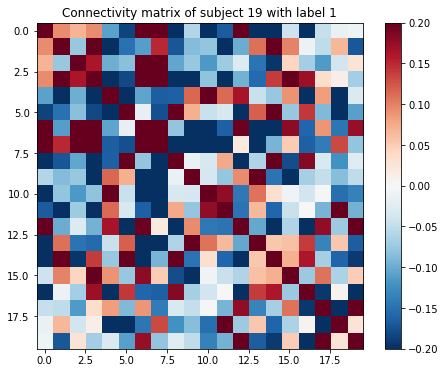

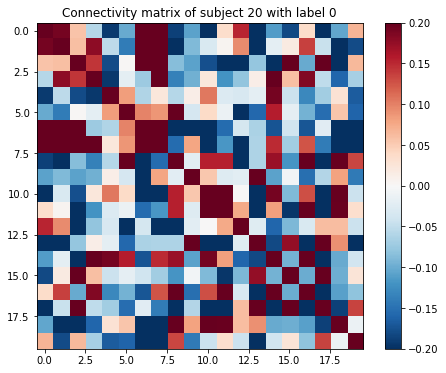

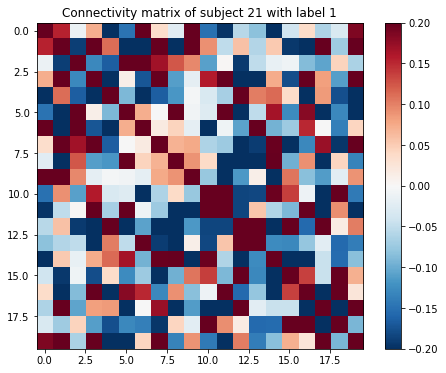

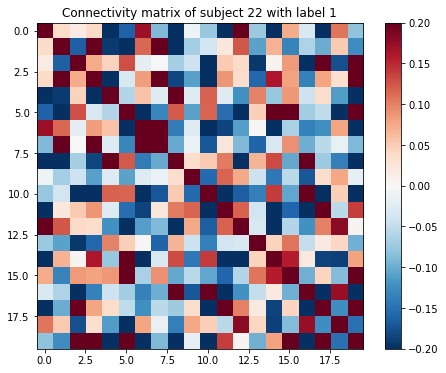

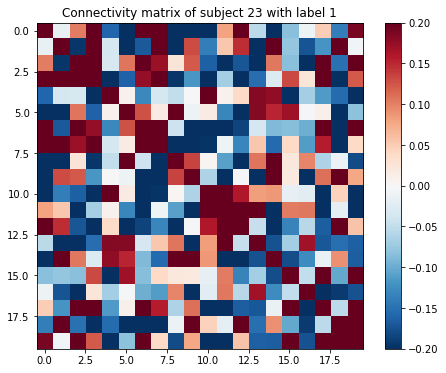

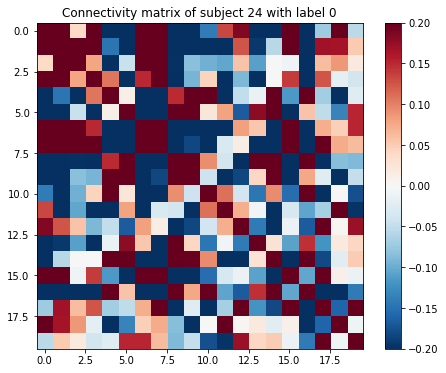

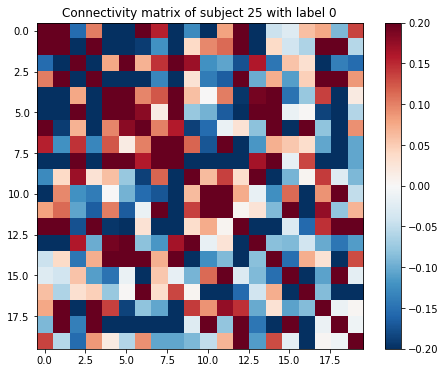

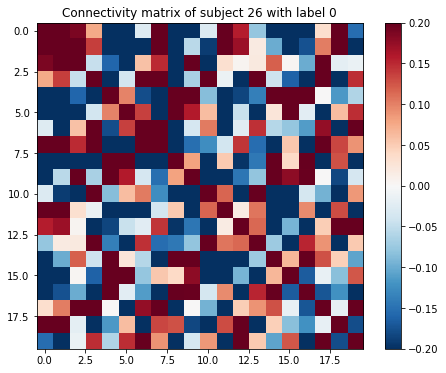

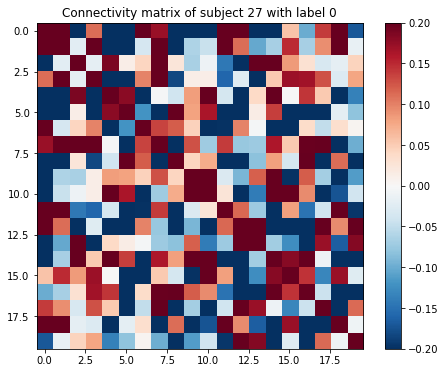

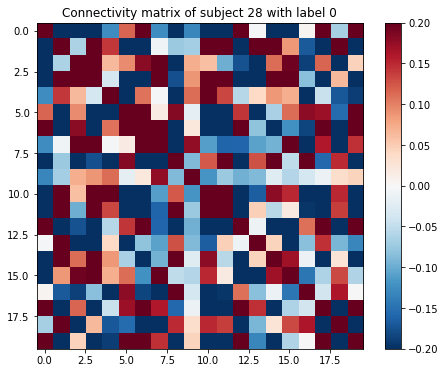

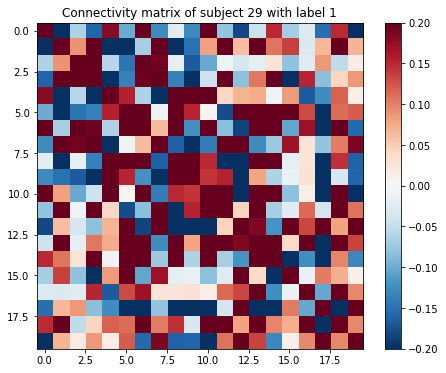

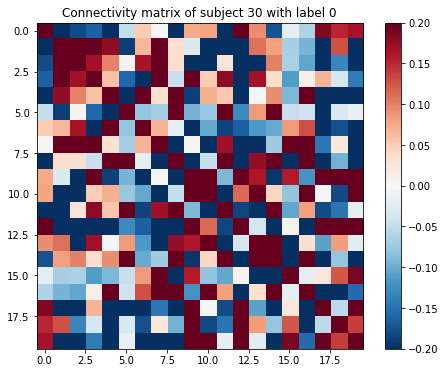

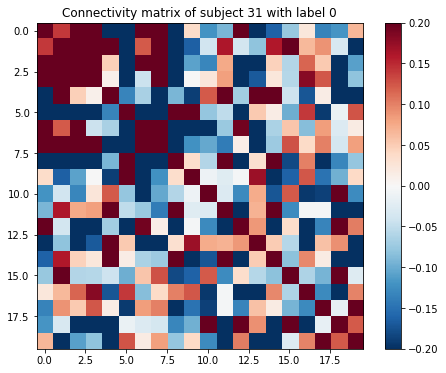

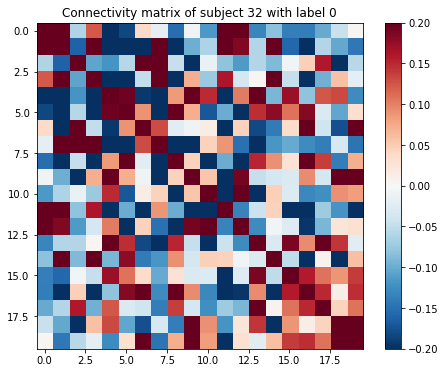

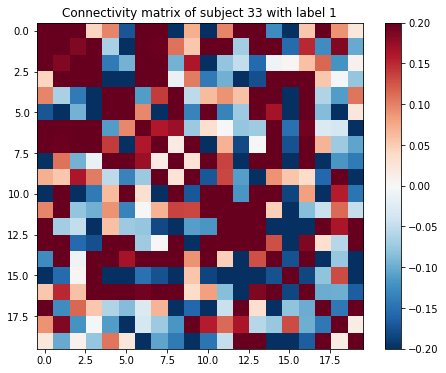

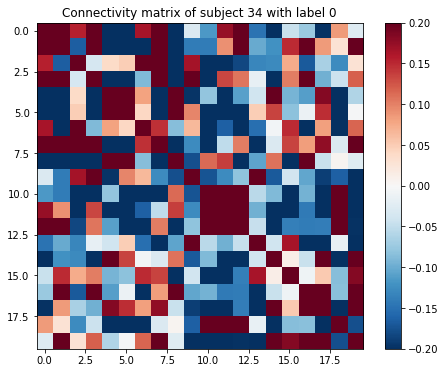

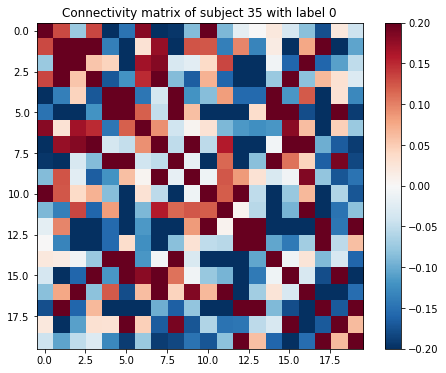

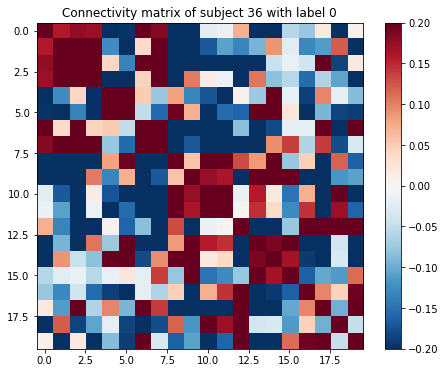

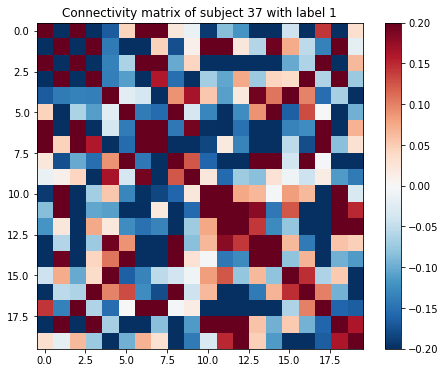

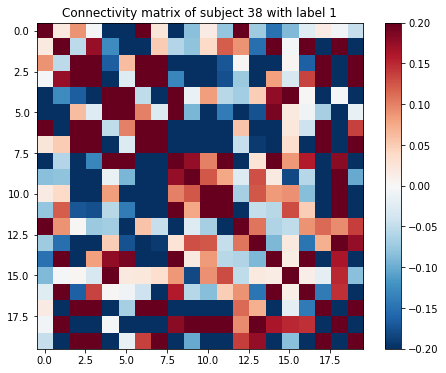

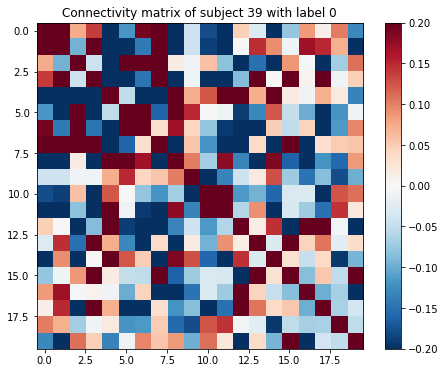

In [9]:
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt

correlation_measure = ConnectivityMeasure(kind="correlation")
correlation_matrices = correlation_measure.fit_transform(subjects)
for i in range(40):
 plt.figure(figsize=(8,6))
 plt.imshow(correlation_matrices[i], vmax=.20, vmin=-.20, cmap='RdBu_r')
 plt.colorbar()
 plt.title('Connectivity matrix of subject {} with label {}'.format(i, labels[i]))

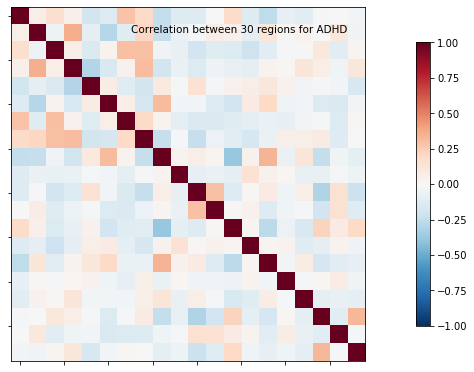

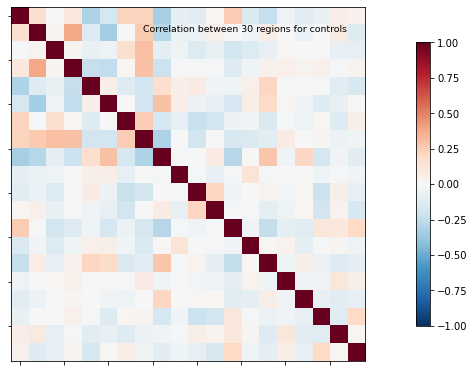

In [12]:
#Separating the correlation matrices between treatment and control subjects
adhd_correlations = []
control_correlations = []
for i in range(40):
    if labels[i] == 1:
        adhd_correlations.append(correlation_matrices[i])
    else:
        control_correlations.append(correlation_matrices[i])
#Getting the mean correlation matrix across all treatment subjects
mean_correlations_adhd = np.mean(adhd_correlations, axis=0).reshape(time_series.shape[-1],
                                                          time_series.shape[-1])
#Getting the mean correlation matrix across all control subjects
mean_correlations_control = np.mean(control_correlations, axis=0).reshape(time_series.shape[-1],
                                                          time_series.shape[-1])
#Visualizing the mean correlation
plotting.plot_matrix(mean_correlations_adhd, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 30 regions for ADHD')
plotting.plot_matrix(mean_correlations_control, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 30 regions for controls')

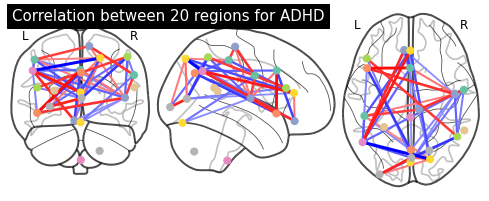

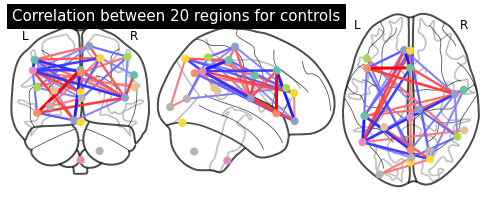

In [13]:
#Getting the center coordinates from the component decomposition to use as atlas labels
coords = plotting.find_probabilistic_atlas_cut_coords(components_img)
#Plotting the connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlations_adhd, coords,
                         edge_threshold="80%", title='Correlation between 20 regions for ADHD')
plotting.plot_connectome(mean_correlations_control, coords,
                         edge_threshold="80%", title='Correlation between 20 regions for controls')
plotting.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(correlation_matrices, labels, test_size=0.3)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='tanh', kernel_initializer='random_normal', input_shape=[20,20]))
#Second Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the model
classifier.compile(optimizer = Adam(lr =.0001),loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the model
classifier.fit(np.array(X_train),np.array(y_train), batch_size=32, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 958ms/step - loss: 0.6932 - accuracy: 0.4821
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.4786
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5268
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5500
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5679
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5375
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5393
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5464
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5375
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5357
Epoch 11/100
1/1 [======

In [16]:
eval_model=classifier.evaluate(np.array(X_train), np.array(y_train))
eval_model

1/1 [==============================] - 0s 302ms/step - loss: 0.6926 - accuracy: 0.5357


[0.6925762295722961, 0.5357142686843872]

In [18]:
y_pred=classifier.predict(X_test,batch_size=32)

In [19]:
np.mean(y_pred,axis=1)

array([[0.49680012],
       [0.49687475],
       [0.4968857 ],
       [0.49679494],
       [0.49673256],
       [0.49701658],
       [0.49692068],
       [0.49672636],
       [0.49685526],
       [0.4967962 ],
       [0.49688753],
       [0.49685496]], dtype=float32)

## Results:

In [20]:
y_pred=classifier.predict(X_test,batch_size=32)
y_pred =(np.mean(y_pred,axis=1)>0.5)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[5 0]
 [7 0]]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GNN

In this section the connectivity matrix was converted into a torch_geometric format and different graph convolutional methods were applied on the data to predict ADHD. convert_corr2geom is the graph constriction function.w

In [22]:
!pip install ray
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

     |████████████████████████████████| 49.7MB 94kB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 133kB 44.3MB/s 
     |████████████████████████████████| 3.1MB 39.4MB/s 
     |████████████████████████████████| 1.3MB 46.5MB/s 
     |████████████████████████████████| 1.0MB 42.7MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 143kB 57.3MB/s 
     |████████████████████████████████| 296kB 52.6MB/s 
     |████████████████████████████████| 92kB 11.3MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp37-none-any.whl size=12621 sha256=67756cf472f6aee95dd2cda748c5a0109129199028b26c83be4f3bf08e77b4b9
  Stored in directory: /root/.cache/pip/wheels/48/b4/d5/fb5b7f1d040f2ff20687e3bad6867d63155dbde5a7c10f4293
Successfully built gpustat
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully unin

     |████████████████████████████████| 2.6MB 10.0MB/s 
     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 215kB 8.0MB/s 
     |████████████████████████████████| 235kB 15.4MB/s 
     |████████████████████████████████| 2.2MB 14.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 


In [86]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,Sequential,SGConv
import torch.nn as nn
from torch_geometric.utils.convert import from_networkx
from torch_geometric.data import Data
import networkx as nx

In [24]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,Sequential
import torch.nn as nn

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(1, 1)
        self.conv2 = GCNConv(1, 1)
        self.fc1 = nn.Linear(20, 1)

    def forward(self, data):
        x, edge_index,edge_weight = data.x, data.edge_index,data.weight
        edge_weight=(edge_weight-edge_weight.min())/(edge_weight.max()-edge_weight.min())

        x = self.conv1(x.reshape(-1,1), edge_index,edge_weight)
        x = F.relu(x)
        #x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index,edge_weight)
        x=self.fc1(x.flatten())

        return torch.sigmoid(x)

In [30]:
def convert_corr2geom(correlation_matrix):

  #correlation_matrix=(correlation_matrix-np.max(correlation_matrix))/(np.min(correlation_matrix)-np.max(correlation_matrix))
  #correlation_matrix=np.where(correlation_matrix>.2,correlation_matrix,0)
  nx_format=nx.convert_matrix.from_numpy_matrix(correlation_matrix,create_using=nx.Graph)

  nx_format.remove_edges_from(list(nx.selfloop_edges(nx_format)))
  degree=nx_format.degree(weight='weight')
  nx.set_node_attributes(nx_format, dict(degree), "x")
  data=from_networkx(nx_format)
  return data

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
BCE_loss = nn.BCELoss()


In [32]:
for i in range(100):
  batch_prediction=[]
  optimizer.zero_grad()
  for i in range(28):
    
    iter_data=convert_corr2geom(X_train[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())

  loss=BCE_loss(torch.tensor(batch_prediction,dtype=torch.float).reshape(28),torch.tensor(y_train,dtype=torch.float).reshape(28) ).requires_grad_()
  print(loss)
  loss.backward()
  optimizer.step()
    


tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requires_grad=True)
tensor(0.6995, requi

In [34]:
batch_prediction=[]
for i in range(12):
    
    iter_data=convert_corr2geom(X_test[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())


## Result:

In [35]:

y_pred =(np.array(batch_prediction)>0.5)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[0 5]
 [0 7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Taking Positive Links Only

In [36]:
def convert_corr2geom(correlation_matrix):

  #correlation_matrix=(correlation_matrix-np.max(correlation_matrix))/(np.min(correlation_matrix)-np.max(correlation_matrix))
  correlation_matrix=np.where(correlation_matrix>0,correlation_matrix,0)
  nx_format=nx.convert_matrix.from_numpy_matrix(correlation_matrix,create_using=nx.Graph)

  nx_format.remove_edges_from(list(nx.selfloop_edges(nx_format)))
  degree=nx_format.degree(weight='weight')
  nx.set_node_attributes(nx_format, dict(degree), "x")
  data=from_networkx(nx_format)
  return data

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
BCE_loss = nn.BCELoss()


In [38]:
for i in range(100):
  batch_prediction=[]
  optimizer.zero_grad()
  for i in range(28):
    
    iter_data=convert_corr2geom(X_train[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())

  loss=BCE_loss(torch.tensor(batch_prediction,dtype=torch.float).reshape(28),torch.tensor(y_train,dtype=torch.float).reshape(28) ).requires_grad_()
  print(loss)
  loss.backward()
  optimizer.step()
    


tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requires_grad=True)
tensor(0.6942, requi

In [39]:
batch_prediction=[]
for i in range(12):
    
    iter_data=convert_corr2geom(X_test[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())


In [40]:

y_pred =(np.array(batch_prediction)>0.5)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[0 5]
 [0 7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Taking Negative Edge Weights Only:

In [41]:
def convert_corr2geom(correlation_matrix):

  #correlation_matrix=(correlation_matrix-np.max(correlation_matrix))/(np.min(correlation_matrix)-np.max(correlation_matrix))
  correlation_matrix=np.where(correlation_matrix<0,correlation_matrix,0)
  nx_format=nx.convert_matrix.from_numpy_matrix(correlation_matrix,create_using=nx.Graph)

  nx_format.remove_edges_from(list(nx.selfloop_edges(nx_format)))
  degree=nx_format.degree(weight='weight')
  nx.set_node_attributes(nx_format, dict(degree), "x")
  data=from_networkx(nx_format)
  return data

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
BCE_loss = nn.BCELoss()


In [43]:
for i in range(100):
  batch_prediction=[]
  optimizer.zero_grad()
  for i in range(28):
    
    iter_data=convert_corr2geom(X_train[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())

  loss=BCE_loss(torch.tensor(batch_prediction,dtype=torch.float).reshape(28),torch.tensor(y_train,dtype=torch.float).reshape(28) ).requires_grad_()
  print(loss)
  loss.backward()
  optimizer.step()
    


tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requires_grad=True)
tensor(0.6912, requi

In [44]:
batch_prediction=[]
for i in range(12):
    
    iter_data=convert_corr2geom(X_test[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())


In [45]:

y_pred =(np.array(batch_prediction)>0.5)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[5 0]
 [7 0]]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Scaling Up the edge weights




In [64]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(1, 1)
        self.conv2 = GCNConv(1, 1)
        self.fc1 = nn.Linear(20, 1)

    def forward(self, data):
        x, edge_index,edge_weight = data.x, data.edge_index,data.weight
        #edge_weight=edge_weight*10000

        x = self.conv1(x.reshape(-1,1), edge_index,edge_weight)
        x = F.relu(x)
        #x = F.dropout(x, training=self.training)
        #x = self.conv2(x, edge_index,edge_weight)
        x=self.fc1(x.flatten())

        return torch.sigmoid(x)

In [61]:
def convert_corr2geom(correlation_matrix):

  #correlation_matrix=(correlation_matrix-np.max(correlation_matrix))/(np.min(correlation_matrix)-np.max(correlation_matrix))
  #correlation_matrix=np.where(correlation_matrix>.2,correlation_matrix,0)
  nx_format=nx.convert_matrix.from_numpy_matrix(correlation_matrix,create_using=nx.Graph)

  nx_format.remove_edges_from(list(nx.selfloop_edges(nx_format)))
  degree=nx_format.degree(weight='weight')
  nx.set_node_attributes(nx_format, dict(degree), "x")
  data=from_networkx(nx_format)
  return data

In [65]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
BCE_loss = nn.BCELoss()


In [67]:
for i in range(100):
  batch_prediction=[]
  optimizer.zero_grad()
  for i in range(28):
    
    iter_data=convert_corr2geom(X_train[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())

  loss=BCE_loss(torch.tensor(batch_prediction,dtype=torch.float).reshape(28),torch.tensor(y_train,dtype=torch.float).reshape(28) ).requires_grad_()
  print(loss)
  loss.backward()
  optimizer.step()
    


RuntimeError: ignored

In [ ]:
batch_prediction=[]
for i in range(12):
    
    iter_data=convert_corr2geom(X_test[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())


## Result:

In [ ]:

y_pred =(np.array(batch_prediction)>0.5)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[0 5]
 [0 7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Without Edge Weight:

In [68]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(1, 1)
        self.conv2 = GCNConv(1, 1)
        self.fc1 = nn.Linear(20, 1)

    def forward(self, data):
        x, edge_index,edge_weight = data.x, data.edge_index,data.weight
        #edge_weight=edge_weight*10000

        x = self.conv1(x.reshape(-1,1), edge_index)
        x = F.relu(x)
        #x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x=self.fc1(x.flatten())

        return torch.sigmoid(x)

In [77]:
def convert_corr2geom(correlation_matrix):

  #correlation_matrix=(correlation_matrix-np.max(correlation_matrix))/(np.min(correlation_matrix)-np.max(correlation_matrix))
  correlation_matrix=np.where(np.abs(correlation_matrix)>.1,correlation_matrix,0)
  nx_format=nx.convert_matrix.from_numpy_matrix(correlation_matrix,create_using=nx.Graph)

  nx_format.remove_edges_from(list(nx.selfloop_edges(nx_format)))
  degree=nx_format.degree(weight='weight')
  nx.set_node_attributes(nx_format, dict(degree), "x")
  data=from_networkx(nx_format)
  return data

In [78]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
BCE_loss = nn.BCELoss()


In [79]:
for i in range(100):
  batch_prediction=[]
  optimizer.zero_grad()
  for i in range(28):
    
    iter_data=convert_corr2geom(X_train[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())

  loss=BCE_loss(torch.tensor(batch_prediction,dtype=torch.float).reshape(28),torch.tensor(y_train,dtype=torch.float).reshape(28) ).requires_grad_()
  print(loss)
  loss.backward()
  optimizer.step()
    


tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requires_grad=True)
tensor(0.6922, requi

In [80]:
batch_prediction=[]
for i in range(12):
    
    iter_data=convert_corr2geom(X_test[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())


## Result:

In [81]:

y_pred =(np.array(batch_prediction)>0.5)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[4 1]
 [5 2]]
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.67      0.29      0.40         7

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



# SGCN

Signed Graph Convolutional Network is applied in this section understading that polarity of the weight has some effects.

In [90]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = SGConv(1, 1)
        self.conv2 = SGConv(1, 1)
        self.fc1 = nn.Linear(20, 1)

    def forward(self, data):
        x, edge_index,edge_weight = data.x, data.edge_index,data.weight
        #edge_weight=edge_weight*10000

        x = self.conv1(x.reshape(-1,1), edge_index)
        x = F.relu(x)
        #x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x=self.fc1(x.flatten())

        return torch.sigmoid(x)

In [95]:
def convert_corr2geom(correlation_matrix):

  #correlation_matrix=(correlation_matrix-np.max(correlation_matrix))/(np.min(correlation_matrix)-np.max(correlation_matrix))
  correlation_matrix=np.where(np.abs(correlation_matrix)>.3,correlation_matrix,0)
  nx_format=nx.convert_matrix.from_numpy_matrix(correlation_matrix,create_using=nx.Graph)

  nx_format.remove_edges_from(list(nx.selfloop_edges(nx_format)))
  degree=nx_format.degree(weight='weight')
  nx.set_node_attributes(nx_format, dict(degree), "x")
  data=from_networkx(nx_format)
  return data

In [97]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
BCE_loss = nn.BCELoss()


In [98]:
for i in range(100):
  batch_prediction=[]
  optimizer.zero_grad()
  for i in range(28):
    
    iter_data=convert_corr2geom(X_train[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())

  loss=BCE_loss(torch.tensor(batch_prediction,dtype=torch.float).reshape(28),torch.tensor(y_train,dtype=torch.float).reshape(28) ).requires_grad_()
  print(loss)
  loss.backward()
  optimizer.step()
    


tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requires_grad=True)
tensor(0.6911, requi

In [99]:
batch_prediction=[]
for i in range(12):
    
    iter_data=convert_corr2geom(X_test[i])
    prediction=model(iter_data)
    #print(prediction)
    batch_prediction.append(prediction.item())


## Result:

In [101]:

y_pred =(np.array(batch_prediction)>0.5)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[5 0]
 [7 0]]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
